In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


##Components of only panel <br>
Data requirements: PBR matrix, mutation matrix

In [11]:
kind = 'DR'

In [12]:
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.{0}.csv'.format(kind), index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.{0}.csv'.format(kind), index_col=0)

In [13]:
# group mutations by frequency
counts = list(patient_mutations.sum().unique())
mutations_by_count = {}
for count in counts:
    # group all of the mutations with this count in TCGA
    mutations_by_count[count] = list(patient_mutations.sum()[patient_mutations.sum() == count].index)
    # Add column for each patient with the median of their affinities for that mutation count
    patient_affinities[count] = patient_affinities[mutations_by_count[count]].median(axis=1)
counts.sort()

In [14]:
grouped = patient_affinities.ix[:, counts].median().reset_index()
grouped.columns = ['index', 'scores']
p, rho = sp.spearmanr(grouped.index, grouped.scores)[1], sp.spearmanr(grouped.index, grouped.scores)[0]
print p, rho

0.00250152916569 0.488545688546


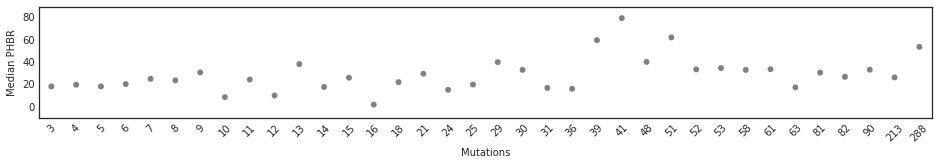

In [15]:
plt.figure(figsize=(16, 2))
ax = sns.pointplot(x='index', y='scores', data=grouped, order=counts, color="grey", join=False)
plt.xticks(rotation=45)
#plt.ylim(0,3.5)
plt.xlabel('Mutations')
plt.ylabel('Median PHBR')
#plt.savefig(PATH_TO_GENERATED_FIGURES + 'pop_frequency.scatter.pdf')

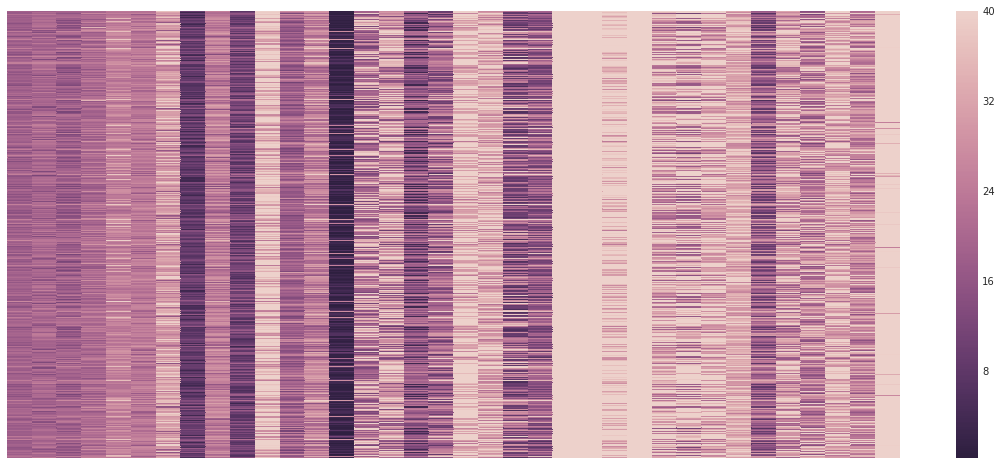

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(patient_affinities.ix[:, counts], xticklabels=False, yticklabels=False, vmax=40, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))
#plt.savefig(PATH_TO_GENERATED_FIGURES + 'pop_frequency.heatmap.pdf')

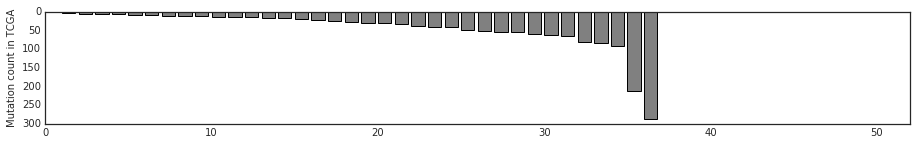

In [17]:
plt.figure(figsize=(15.5,2))
plt.gca().invert_yaxis()
plt.bar(range(1, len(counts)+1), counts, color='grey')
plt.xlim(0, 52)
plt.ylabel('Mutation count in TCGA')
#plt.savefig(PATH_TO_GENERATED_FIGURES + 'pop_frequency.bar.pdf')